From 이수안 컴퓨터: http://suanlab.com/youtube/ml.html

# 앙상블(Ensemble)

* 일반화와 강건성(Robustness)을 향상시키기 위해 여러 모델의 예측 값을 결합하는 방법
* 앙상블에는 크게 두가지 종류가 존재
  * 평균 방법
    * 여러개의 추정값을 독립적으로 구한뒤 평균을 취함
    * 결합 추정값은 분산이 줄어들기 때문에 단일 추정값보다 좋은 성능을 보임
  * 부스팅 방법
    * 순차적으로 모델 생성
    * 결합된 모델의 편향을 감소 시키기 위해 노력
    * 부스팅 방법의 목표는 여러개의 약한 모델들을 결합해 하나의 강력한 앙상블 모델을 구축하는 것

## Bagging meta-estimator

* bagging은 bootstrap aggregating의 줄임말
* 원래 훈련 데이터셋의 일부를 사용해 여러 모델을 훈련
* 각각의 결과를 결합해 최종 결과를 생성
* 분산을 줄이고 과적합을 막음
* 강력하고 복잡한 모델에서 잘 동작

In [203]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import multiprocessing
plt.style.use(['seaborn-whitegrid'])
from matplotlib.colors import ListedColormap

from sklearn.datasets import load_iris, load_wine, load_breast_cancer, load_boston, load_diabetes
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate

from sklearn.ensemble import BaggingClassifier, BaggingRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import ExtraTreesClassifier, ExtraTreesRegressor
from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.ensemble import VotingClassifier, VotingRegressor
from sklearn.ensemble import StackingClassifier, StackingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.svm import SVC, SVR
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

In [2]:
seed = 2022
np.random.seed(seed)

### Bagging을 사용한 분류

#### 데이터셋 불러오기

In [3]:
iris = load_iris()
wine = load_wine()
cancer = load_breast_cancer()

#### KNN

##### 붓꽃 데이터

In [4]:
base_model = make_pipeline(StandardScaler(),
                          KNeighborsClassifier())

bagging_model = BaggingClassifier(base_model,
                                  n_estimators=10,
                                  max_samples=0.5, # 50% 사용
                                  max_features=0.5, # 50% 사용
                                 )

In [5]:
cross_val = cross_validate(estimator=base_model,
               X=iris.data, y=iris.target,
               cv=5,)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.0010042667388916015 (+/- 1.1360739110136992e-05)
avg score time: 0.001190042495727539 (+/- 0.0004016051123904058)
avg test score: 0.96 (+/- 0.024944382578492935)


In [6]:
cross_val = cross_validate(estimator=bagging_model,
               X=iris.data, y=iris.target,
               cv=5,)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.013365364074707032 (+/- 0.0013509332142649184)
avg score time: 0.004993534088134766 (+/- 1.2134170646155402e-05)
avg test score: 0.9533333333333334 (+/- 0.02666666666666666)


##### 와인 데이터

In [7]:
base_model = make_pipeline(StandardScaler(),
                          KNeighborsClassifier())

bagging_model = BaggingClassifier(base_model,
                                  n_estimators=10,
                                  max_samples=0.5, # 50% 사용
                                  max_features=0.5, # 50% 사용
                                 )

In [8]:
cross_val = cross_validate(estimator=base_model,
               X=wine.data, y=wine.target,
               cv=5,)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.0011904239654541016 (+/- 0.0004023296674057333)
avg score time: 0.0012060642242431641 (+/- 0.0004108593597849904)
avg test score: 0.9493650793650794 (+/- 0.037910929811115976)


In [9]:
cross_val = cross_validate(estimator=bagging_model,
               X=wine.data, y=wine.target,
               cv=5,)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.013170337677001953 (+/- 0.0011538945592530494)
avg score time: 0.005989599227905274 (+/- 1.1186278583310374e-05)
avg test score: 0.9607936507936508 (+/- 0.022468028291073656)


##### 유방암 데이터

In [10]:
base_model = make_pipeline(StandardScaler(),
                          KNeighborsClassifier())

bagging_model = BaggingClassifier(base_model,
                                  n_estimators=10,
                                  max_samples=0.5, # 50% 사용
                                  max_features=0.5, # 50% 사용
                                 )

In [11]:
cross_val = cross_validate(estimator=base_model,
               X=cancer.data, y=cancer.target,
               cv=5,)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.000993633270263672 (+/- 1.3985724079817778e-05)
avg score time: 0.003987026214599609 (+/- 6.602774305508657e-06)
avg test score: 0.9648501785437045 (+/- 0.009609970350036127)


In [12]:
cross_val = cross_validate(estimator=bagging_model,
               X=cancer.data, y=cancer.target,
               cv=5,)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.015676403045654298 (+/- 0.001244290046231412)
avg score time: 0.009973907470703125 (+/- 0.0006290277867448651)
avg test score: 0.9630957925787922 (+/- 0.010219838955441114)


#### SVC

##### 붓꽃 데이터

In [13]:
base_model = make_pipeline(StandardScaler(),
                          SVC())

bagging_model = BaggingClassifier(base_model,
                                  n_estimators=10,
                                  max_samples=0.5, # 50% 사용
                                  max_features=0.5, # 50% 사용
                                 )

In [14]:
cross_val = cross_validate(estimator=base_model,
               X=iris.data, y=iris.target,
               cv=5,)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.0008024215698242187 (+/- 0.0004012568281687558)
avg score time: 0.0005954265594482422 (+/- 0.0004867819308714999)
avg test score: 0.9666666666666666 (+/- 0.02108185106778919)


In [15]:
cross_val = cross_validate(estimator=bagging_model,
               X=iris.data, y=iris.target,
               cv=5,)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.01755247116088867 (+/- 0.0011969846171765355)
avg score time: 0.002792978286743164 (+/- 0.0003991850351030274)
avg test score: 0.9399999999999998 (+/- 0.024944382578492935)


In [16]:
cross_val.keys()

dict_keys(['fit_time', 'score_time', 'test_score'])

##### 와인 데이터

In [17]:
base_model = make_pipeline(StandardScaler(),
                          SVC())

bagging_model = BaggingClassifier(base_model,
                                  n_estimators=10,
                                  max_samples=0.5, # 50% 사용
                                  max_features=0.5, # 50% 사용
                                 )

In [18]:
cross_val = cross_validate(estimator=base_model,
               X=wine.data, y=wine.target,
               cv=5,)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.0014017581939697265 (+/- 0.0004963697225085382)
avg score time: 0.0005987167358398437 (+/- 0.000489180322020518)
avg test score: 0.9833333333333334 (+/- 0.022222222222222233)


In [19]:
cross_val = cross_validate(estimator=bagging_model,
               X=wine.data, y=wine.target,
               cv=5,)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.01875028610229492 (+/- 0.0017162718472097012)
avg score time: 0.003190898895263672 (+/- 0.0003989223370332614)
avg test score: 0.9665079365079364 (+/- 0.027185986341561497)


In [20]:
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.2, random_state=seed)

In [21]:
base_model = make_pipeline(StandardScaler(),
                          SVC())
base_model.fit(X_train, y_train)
print('base model 훈련 정확도: {}'.format(base_model.score(wine.data, wine.target)))

base model 훈련 정확도: 1.0


In [22]:
base_model = make_pipeline(StandardScaler(),
                          SVC())
base_model.fit(X_test, y_test)
print('base model 테스트 정확도: {}'.format(base_model.score(wine.data, wine.target)))

base model 테스트 정확도: 0.9831460674157303


In [23]:
base_model = make_pipeline(StandardScaler(),
                          SVC())

bagging_model = BaggingClassifier(base_model,
                                  n_estimators=10,
                                  max_samples=0.5, # 50% 사용
                                  max_features=0.5, # 50% 사용
                                 )

bagging_model.fit(X_train, y_train)
print('bagging model 훈련 정확도: {}'.format(bagging_model.score(wine.data, wine.target)))

bagging model 훈련 정확도: 0.9943820224719101


In [24]:
base_model = make_pipeline(StandardScaler(),
                          SVC())

bagging_model = BaggingClassifier(base_model,
                                  n_estimators=10,
                                  max_samples=0.5, # 50% 사용
                                  max_features=0.5, # 50% 사용
                                 )

bagging_model.fit(X_test, y_test)
print('bagging model 테스트 정확도: {}'.format(bagging_model.score(wine.data, wine.target)))

bagging model 테스트 정확도: 0.9269662921348315


##### 유방암 데이터

In [25]:
cancer = load_breast_cancer()

In [26]:
base_model = make_pipeline(StandardScaler(),
                          SVC())

In [27]:
bagging_model = BaggingClassifier(base_model,
                                  n_estimators=10,
                                  max_samples=0.5, # 50% 사용
                                  max_features=0.5, # 50% 사용
                                 )

In [28]:
cross_val = cross_validate(estimator=base_model,
              X=cancer.data, y=cancer.target,
              cv=5, verbose=1)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


In [29]:
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.00578455924987793 (+/- 0.001325044601722617)
avg score time: 0.002398967742919922 (+/- 0.0008013960688341926)
avg test score: 0.9736376339077782 (+/- 0.014678541667933545)


In [30]:
base_model.fit(cancer.data, cancer.target)
print('bagging model 테스트 정확도: {}'.format(base_model.score(cancer.data, cancer.target)))

bagging model 테스트 정확도: 0.9876977152899824


In [31]:
cross_val = cross_validate(estimator=bagging_model,
              X=cancer.data, y=cancer.target,
              cv=5, verbose=1)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished


In [32]:
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.02493319511413574 (+/- 0.002274037855279437)
avg score time: 0.008975648880004882 (+/- 0.0006306756412507959)
avg test score: 0.9613258810743673 (+/- 0.016295338833238505)


In [33]:
bagging_model.fit(cancer.data, cancer.target)
print('bagging model 테스트 정확도: {}'.format(bagging_model.score(cancer.data, cancer.target)))

bagging model 테스트 정확도: 0.9771528998242531


#### Decision Tree

##### 붓꽃 데이터

In [34]:
base_model = make_pipeline(StandardScaler(),
                          DecisionTreeClassifier())

In [35]:
bagging_model = BaggingClassifier(base_model,
                                  n_estimators=10,
                                  max_features=0.5,
                                  max_samples=0.5)

In [36]:
cross_val = cross_validate(estimator=base_model,
              X=iris.data, y=iris.target,
              cv=5, n_jobs=multiprocessing.cpu_count(),
              verbose=1)

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   5 | elapsed:    1.5s remaining:    2.3s
[Parallel(n_jobs=8)]: Done   5 out of   5 | elapsed:    1.5s finished


In [37]:
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.0020009517669677735 (+/- 1.125537724867324e-05)
avg score time: 0.00039882659912109374 (+/- 0.0004884608318481088)
avg test score: 0.9666666666666668 (+/- 0.036514837167011066)


In [38]:
cross_val = cross_validate(estimator=bagging_model,
              X=iris.data, y=iris.target,
              cv=5, n_jobs=multiprocessing.cpu_count(),
              verbose=1)

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   5 out of   5 | elapsed:    0.9s finished


In [39]:
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.01815800666809082 (+/- 0.002698646647409577)
avg score time: 0.0017933845520019531 (+/- 0.0004004254906090998)
avg test score: 0.9466666666666667 (+/- 0.04521553322083511)


##### 와인 데이터

##### 유방암 데이터

### Bagging을 사용한 회귀

#### 데이터셋 불러오기

In [40]:
boston = load_boston()
diabetes = load_diabetes()

#### KNN

##### 보스턴 주택 가격 데이터

In [41]:
base_model = make_pipeline(StandardScaler(),
                         KNeighborsRegressor())

In [42]:
bagging_model = BaggingRegressor(base_model,
                                 n_estimators=10,
                                 max_features=0.5,
                                 max_samples=0.5)                            

In [43]:
cross_val = cross_validate(base_model,
              X=boston.data, y=boston.target,
              cv=5, n_jobs=multiprocessing.cpu_count(),
              verbose=1)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score : {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.0019883155822753907 (+/- 0.0006219682570934673)
avg score time: 0.0014188766479492187 (+/- 0.0004933659757921187)
avg test score : 0.47357748833823543 (+/- 0.13243123464477455)


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   5 out of   5 | elapsed:    0.0s finished


In [44]:
cross_val = cross_validate(bagging_model,
              X=boston.data, y=boston.target,
              cv=5, n_jobs=multiprocessing.cpu_count(),
              verbose=1)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score : {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.01834549903869629 (+/- 0.0011705431212419627)
avg score time: 0.007977485656738281 (+/- 0.0012618037093971443)
avg test score : 0.4581773583997573 (+/- 0.1261680721813464)


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   5 out of   5 | elapsed:    0.0s finished


##### 당뇨병 데이터

In [45]:
base_model = make_pipeline(StandardScaler(),
                           KNeighborsRegressor())

In [46]:
bagging_model = BaggingRegressor(base_model,
                                n_estimators=10,
                                max_features=0.5,
                                max_samples=0.5)

In [47]:
cross_val = cross_validate(base_model,
                          X=diabetes.data, y=diabetes.target,
                          cv=5, n_jobs=multiprocessing.cpu_count(),
                           verbose=1)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score : {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.0012112140655517578 (+/- 0.00040389918339646554)
avg score time: 0.0014072418212890624 (+/- 0.0004841635443557474)
avg test score : 0.3689720650295623 (+/- 0.044659049060165365)


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   5 out of   5 | elapsed:    0.0s finished


In [48]:
cross_val = cross_validate(bagging_model,
                          X=diabetes.data, y=diabetes.target,
                          cv=5, n_jobs=multiprocessing.cpu_count(),
                           verbose=1)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score : {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.015981149673461915 (+/- 1.2152707399892297e-05)
avg score time: 0.0069636344909667965 (+/- 0.0006108870355304545)
avg test score : 0.37772970396464683 (+/- 0.06975187052419661)


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   5 out of   5 | elapsed:    0.0s finished


#### SVR

##### 보스턴 주택 가격 데이터

In [49]:
base_model = make_pipeline(StandardScaler(),
                          SVR())

In [50]:
bagging_model = BaggingRegressor(base_model,
                                n_estimators=10,
                                max_features=0.5,
                                max_samples=0.5)

In [51]:
cross_val = cross_validate(base_model,
                          X=boston.data, y=boston.target,
                          cv=5, n_jobs=multiprocessing.cpu_count(),
                          verbose=1)

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   5 out of   5 | elapsed:    0.0s finished


In [52]:
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.008747673034667969 (+/- 0.0003989224795256802)
avg score time: 0.004217290878295898 (+/- 0.00039916210825845184)
avg test score: 0.17631266230186618 (+/- 0.5224914915128981)


In [53]:
cross_val = cross_validate(bagging_model,
                          X=boston.data, y=boston.target,
                          cv=5, n_jobs=multiprocessing.cpu_count(),
                          verbose=1)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s


avg fit time: 0.03473353385925293 (+/- 0.0003972110770775882)
avg score time: 0.018121910095214844 (+/- 0.0003983024350327646)
avg test score: 0.20469720780555617 (+/- 0.2555579908899501)


[Parallel(n_jobs=8)]: Done   5 out of   5 | elapsed:    0.0s finished


##### 당뇨병 데이터

In [54]:
cross_val = cross_validate(base_model,
                          X=diabetes.data, y=diabetes.target,
                          cv=5, n_jobs=multiprocessing.cpu_count(),
                          verbose=1)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.0077683448791503905 (+/- 0.0003941867864235166)
avg score time: 0.003989648818969726 (+/- 4.370284743266907e-07)
avg test score: 0.14659936199629434 (+/- 0.02190798003342928)


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   5 out of   5 | elapsed:    0.0s finished


In [55]:
cross_val = cross_validate(bagging_model,
                          X=diabetes.data, y=diabetes.target,
                          cv=5, n_jobs=multiprocessing.cpu_count(),
                          verbose=1)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.


avg fit time: 0.02829456329345703 (+/- 0.0004895936522646783)
avg score time: 0.015557098388671874 (+/- 0.000488753118722365)
avg test score: 0.06410564468649096 (+/- 0.030772097518503804)


[Parallel(n_jobs=8)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   5 out of   5 | elapsed:    0.0s finished


#### Decision Tree

##### 보스턴 주택 가격 데이터

In [56]:
base_model = make_pipeline(StandardScaler(),
                          DecisionTreeRegressor())

In [57]:
bagging_model = BaggingRegressor(base_model,
                                 n_estimators=10,
                                 max_features=0.5,
                                 max_samples=0.5)

In [58]:
cross_val = cross_validate(base_model,
                          X=boston.data, y=boston.target,
                          cv=5, n_jobs=multiprocessing.cpu_count(),
                          verbose=1)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.003987264633178711 (+/- 2.686417774391799e-06)
avg score time: 0.0007981300354003906 (+/- 0.0003990651458975228)
avg test score: 0.18780133232197693 (+/- 0.7156440097451394)


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   5 out of   5 | elapsed:    0.0s finished


In [59]:
cross_val = cross_validate(bagging_model,
                          X=boston.data, y=boston.target,
                          cv=5, n_jobs=multiprocessing.cpu_count(),
                          verbose=1)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s


avg fit time: 0.026511192321777344 (+/- 0.00047467911664650283)
avg score time: 0.0015985488891601563 (+/- 0.0004894543410420582)
avg test score: 0.3729093086671179 (+/- 0.32679252416030746)


[Parallel(n_jobs=8)]: Done   5 out of   5 | elapsed:    0.0s finished


##### 당뇨병 데이터

In [60]:
cross_val = cross_validate(base_model,
                          X=diabetes.data, y=diabetes.target,
                          cv=5, n_jobs=multiprocessing.cpu_count(),
                          verbose=1)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.002593374252319336 (+/- 0.0004887918739736172)
avg score time: 0.0001994609832763672 (+/- 0.00039892196655273444)
avg test score: -0.1362291362009948 (+/- 0.11517085500020639)


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   5 out of   5 | elapsed:    0.0s finished


In [61]:
cross_val = cross_validate(bagging_model,
                          X=diabetes.data, y=diabetes.target,
                          cv=5, n_jobs=multiprocessing.cpu_count(),
                          verbose=1)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   5 out of   5 | elapsed:    0.0s finished


avg fit time: 0.02293877601623535 (+/- 2.3360154559928684e-07)
avg score time: 0.001994800567626953 (+/- 2.3360154559928687e-07)
avg test score: 0.3903720926143516 (+/- 0.07862499153002911)


## Forests of randomized trees

* `sklearn.ensemble` 모듈에는 무작위 결정 트리를 기반으로하는 두 개의 평균화 알고리즘이 존재
  * Random Forest
  * Extra-Trees
* 모델 구성에 임의성을 추가해 다양한 모델 집합이 생성
* 앙상블 모델의 예측은 각 모델의 평균

In [62]:
# from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
# from sklearn.ensemble import ExtraTreesClassifier, ExtraTreesRegressor

### Random Forests 분류

In [63]:
model = make_pipeline(StandardScaler(),
                     RandomForestClassifier())

In [64]:
cross_val = cross_validate(estimator=model,
                          X=iris.data, y=iris.target,
                          cv=5, n_jobs=multiprocessing.cpu_count(),
                          verbose=1)

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=8)]: Done   5 out of   5 | elapsed:    0.0s finished


In [65]:
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.09733972549438477 (+/- 0.0013531336644449377)
avg score time: 0.006781482696533203 (+/- 0.00039918438006859895)
avg test score: 0.9666666666666668 (+/- 0.02108185106778919)


### Random Forests 회귀

In [66]:
model = make_pipeline(StandardScaler(),
                     RandomForestRegressor())

In [67]:
cross_val = cross_validate(estimator=model,
                          X=boston.data, y=boston.target,
                          cv=5, n_jobs=multiprocessing.cpu_count(),
                          verbose=1)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.


avg fit time: 0.21781573295593262 (+/- 0.002053683039752265)
avg score time: 0.0065823554992675785 (+/- 0.0004885971595254055)
avg test score: 0.6151575763922411 (+/- 0.21605138592345097)


[Parallel(n_jobs=8)]: Done   2 out of   5 | elapsed:    0.1s remaining:    0.3s
[Parallel(n_jobs=8)]: Done   5 out of   5 | elapsed:    0.1s finished


In [68]:
cross_val = cross_validate(estimator=model,
                          X=diabetes.data, y=diabetes.target,
                          cv=5, n_jobs=multiprocessing.cpu_count(),
                          verbose=1)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   5 | elapsed:    0.1s remaining:    0.2s


avg fit time: 0.15728564262390138 (+/- 0.001208127250656595)
avg score time: 0.006184244155883789 (+/- 0.00024945942721001525)
avg test score: 0.42068397433575655 (+/- 0.04790586629264297)


[Parallel(n_jobs=8)]: Done   5 out of   5 | elapsed:    0.1s finished


### Extremely Randomized Trees 분류

In [69]:
model = make_pipeline(StandardScaler(),
                     ExtraTreesClassifier())

In [70]:
cross_val = cross_validate(estimator=model,
                          X=iris.data, y=iris.target,
                          cv=5, n_jobs=multiprocessing.cpu_count(),
                          verbose=1)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.060637617111206056 (+/- 0.0007470288129525876)
avg score time: 0.007579803466796875 (+/- 0.0004895902388169496)
avg test score: 0.9533333333333334 (+/- 0.03399346342395189)


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   5 out of   5 | elapsed:    0.0s finished


In [71]:
cross_val = cross_validate(estimator=model,
                          X=wine.data, y=wine.target,
                          cv=5, n_jobs=multiprocessing.cpu_count(),
                          verbose=1)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s


avg fit time: 0.06642227172851563 (+/- 0.0004884609947696123)
avg score time: 0.0071812629699707035 (+/- 0.0003991847218258262)
avg test score: 0.9833333333333332 (+/- 0.022222222222222233)


[Parallel(n_jobs=8)]: Done   5 out of   5 | elapsed:    0.0s finished


In [72]:
cross_val = cross_validate(estimator=model,
                          X=cancer.data, y=cancer.target,
                          cv=5, n_jobs=multiprocessing.cpu_count(),
                          verbose=1)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   5 out of   5 | elapsed:    0.0s finished


avg fit time: 0.07810096740722657 (+/- 0.0007460472544073931)
avg score time: 0.00797863006591797 (+/- 4.623107774177865e-07)
avg test score: 0.9630957925787922 (+/- 0.018726310832239395)


### Extremely Randomized Trees 회귀

In [73]:
model = make_pipeline(StandardScaler(),
                     ExtraTreesRegressor())

In [74]:
cross_val = cross_validate(estimator=model,
                           X=boston.data, y=boston.target,
                           cv=5, n_jobs=multiprocessing.cpu_count(),
                           verbose=1)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.


avg fit time: 0.14033155441284179 (+/- 0.0011628184454979186)
avg score time: 0.007779407501220703 (+/- 0.00039877904369457556)
avg test score: 0.6241968963942629 (+/- 0.25259073500813123)


[Parallel(n_jobs=8)]: Done   2 out of   5 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=8)]: Done   5 out of   5 | elapsed:    0.1s finished


In [75]:
cross_val = cross_validate(estimator=model,
                           X=diabetes.data, y=diabetes.target,
                           cv=5, n_jobs=multiprocessing.cpu_count(),
                           verbose=1)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.


avg fit time: 0.11799216270446777 (+/- 0.0007465440884209856)
avg score time: 0.006184196472167969 (+/- 0.00039906503194434484)
avg test score: 0.4405458417560223 (+/- 0.0380253230443529)


[Parallel(n_jobs=8)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=8)]: Done   5 out of   5 | elapsed:    0.0s finished


### Random Forest, Extra Tree 시각화

* 결정 트리, Random Forest, Extra Tree의 결정 경계와 회귀식 시각화

In [76]:
n_classes = 3
n_estimator = 30
cmap = plt.cm.RdYlBu
plot_step = 0.02
plot_step_coarser = 0.5
RANDOM_SEED = 13

In [80]:
iris = load_iris()
plot_idx = 1
models = [DecisionTreeClassifier(max_depth=None),
         RandomForestClassifier(n_estimators=n_estimator),
         ExtraTreesClassifier(n_estimators=n_estimator)]

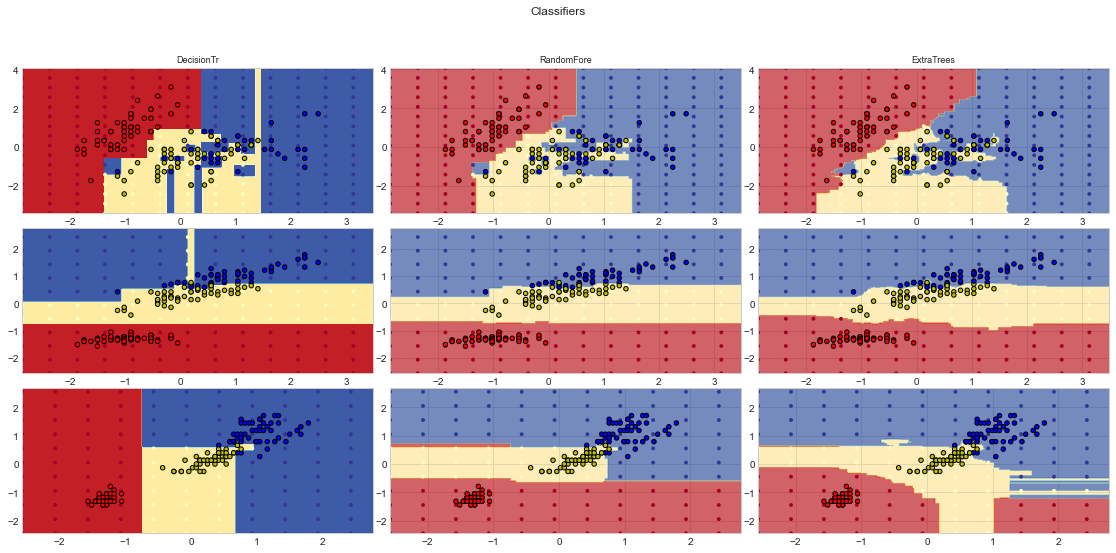

In [81]:
plt.figure(figsize=(16,8))

for pair in ([0,1], [0,2], [2,3]):
    for model in models:        
        X = iris.data[:,pair]
        y = iris.target
        
        idx = np.arange(X.shape[0])
        np.random.seed(RANDOM_SEED)
        np.random.shuffle(idx)
        
        X = X[idx]
        y = y[idx]
        
        mean = X.mean(axis=0)
        std = X.std(axis=0)
        X = (X-mean) / std
        
        model.fit(X, y)
        
        model_title = str(type(model)).split(".")[-1][:-2][:len("Classifier")]
        
        plt.subplot(3,3, plot_idx)
        if plot_idx <= len(models):
            plt.title(model_title, fontsize=9)
            
        x_min, x_max = X[:, 0].min()-1, X[:, 0].max()+1
        y_min, y_max = X[:, 1].min()-1, X[:, 1].max()+1
        
        xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                            np.arange(y_min, y_max, plot_step))
        
        if isinstance(model, DecisionTreeClassifier):
            Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
            Z = Z.reshape(xx.shape)
            cs = plt.contourf(xx, yy, Z, cmap=cmap)
        else:
            estimator_alpha = 1.0 / len(model.estimators_)
            for tree in model.estimators_:
                Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
                Z = Z.reshape(xx.shape)
                cs = plt.contourf(xx, yy, Z, alpha=estimator_alpha, cmap=cmap)
                
        xx_coarser, yy_coarser = np.meshgrid(np.arange(x_min, x_max, plot_step_coarser),
                                            np.arange(y_min, y_max, plot_step_coarser))
        
        Z_points_coarser = model.predict(np.c_[xx_coarser.ravel(), 
                                               yy_coarser.ravel()]).reshape(xx_coarser.shape)
        
        cs_points = plt.scatter(xx_coarser, yy_coarser, s=15,
                               c=Z_points_coarser, cmap=cmap,
                               edgecolors='none')
        
        plt.scatter(X[:, 0], X[:,1], c=y,
                   cmap=ListedColormap(['r', 'y', 'b']),
                   edgecolor='k', s=20,)
        plot_idx += 1
        
plt.suptitle('Classifiers', fontsize=12)
plt.axis('tight')
plt.tight_layout(h_pad=0.2, w_pad=0.2, pad=2.5)
plt.show()

In [92]:
plot_idx = 1
models = [DecisionTreeRegressor(max_depth=None),
         RandomForestRegressor(n_estimators=n_estimator),
         ExtraTreesRegressor(n_estimators=n_estimator)]

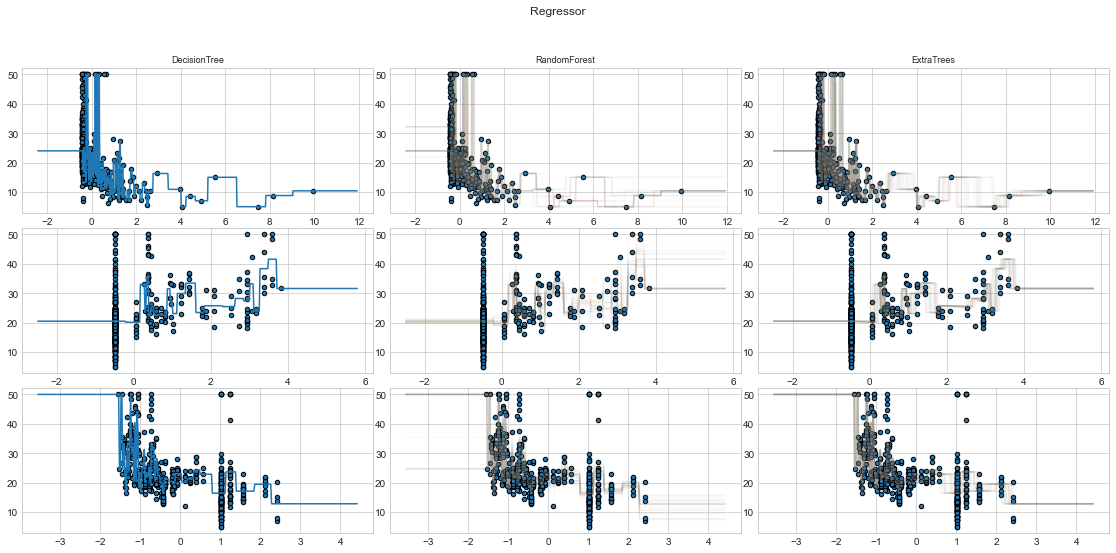

In [93]:
plt.figure(figsize=(16,8))

for pair in (0,1,2):
    for model in models:
        
        X = boston.data[:, pair]
        y = boston.target
        
        idx = np.arange(X.shape[0])
        np.random.seed(RANDOM_SEED)
        np.random.shuffle(idx)
        X = X[idx]
        y = y[idx]
        
        mean = X.mean(axis=0)
        std = X.std(axis=0)
        X = (X - mean) / std
        
        model.fit(X.reshape(-1,1), y)
        
        model_title = str(type(model)).split(".")[-1][:-2][:-len('Regressor')]
        
        plt.subplot(3, 3, plot_idx)
        if plot_idx <= len(models):
            plt.title(model_title, fontsize=9)
            
        x_min, x_max = X.min()-1, X.max()+1
        y_min, y_max = y.min()-1, y.max()+1
        xx, yy = np.arange(x_min-1, x_max+1, plot_step), np.arange(y_min-1, y_max+1, plot_step)
        
        if isinstance(model, DecisionTreeRegressor):
            Z = model.predict(xx.reshape(-1,1))
            cs = plt.plot(xx, Z)
        else:
            estimator_alpha = 1.0 / len(model.estimators_)
            for tree in model.estimators_:
                Z = tree.predict(xx.reshape(-1,1))
                cs = plt.plot(xx, Z, alpha=estimator_alpha)
                
        plt.scatter(X, y, edgecolor='k', s=20)
        plot_idx += 1
        
plt.suptitle("Regressor", fontsize=12)
plt.axis('tight')
plt.tight_layout(h_pad = 0.2, w_pad=0.2, pad=2.5)
plt.show()

## AdaBoost

* 대표적인 부스팅 알고리즘
* 일련의 약한 모델들을 학습
* 수정된 버전의 데이터를 반복 학습 (가중치가 적용된)
* 가중치 투표(또는 합)을 통해 각 모델의 예측 값을 결합
* 첫 단계에서는 원본 데이터를 학습하고 연속적인 반복마다 개별 샘플에 대한 가중치가 수정되고 다시 모델이 학습
  * 잘못 예측된 샘플은 가중치 증가, 올바르게 예측된 샘플은 가중치 감소
  * 각각의 약한 모델들은 예측하기 어려운 샘플에 집중하게 됨

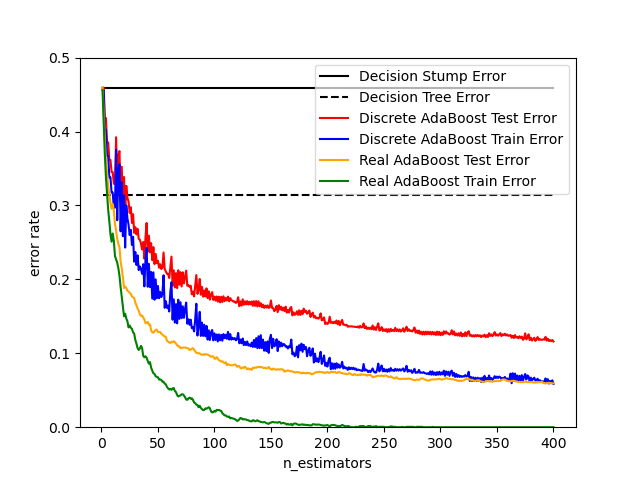

In [95]:
from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor

### AdaBoost 분류

In [96]:
model = make_pipeline(StandardScaler(),
                      AdaBoostClassifier(),)

In [102]:
cross_val = cross_validate(model,
                          X=iris.data, y=iris.target,
                          cv=5, n_jobs=multiprocessing.cpu_count(),
                          verbose=1)

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   5 out of   5 | elapsed:    0.0s finished


In [103]:
print("avg fit time: {} (+/- {})".format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print("avg score time: {} (+/- {})".format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print("avg test score: {} (+/- {})".format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.050449562072753903 (+/- 0.0008028651454998836)
avg score time: 0.004989147186279297 (+/- 2.9200193199910856e-06)
avg test score: 0.9466666666666667 (+/- 0.03399346342395189)


In [104]:
cross_val = cross_validate(model,
                          X=wine.data, y=wine.target,
                          cv=5, n_jobs=multiprocessing.cpu_count(),
                          verbose=1)

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   5 out of   5 | elapsed:    1.1s finished


In [105]:
print("avg fit time: {} (+/- {})".format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print("avg score time: {} (+/- {})".format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print("avg test score: {} (+/- {})".format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.05944151878356933 (+/- 0.005262783916244401)
avg score time: 0.006381797790527344 (+/- 0.0010177106144113105)
avg test score: 0.8085714285714285 (+/- 0.16822356718459935)


### AdaBoost 회귀

In [106]:
model = make_pipeline(StandardScaler(),
                     AdaBoostRegressor())

In [108]:
cross_val = cross_validate(model,
                          X=boston.data, y=boston.target,
                          cv=5, n_jobs=multiprocessing.cpu_count(),
                          verbose=1)

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   5 out of   5 | elapsed:    0.0s finished


In [109]:
print("avg fit time: {} (+/- {})".format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print("avg score time: {} (+/- {})".format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print("avg test score: {} (+/- {})".format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.06858854293823242 (+/- 0.0007386291372908719)
avg score time: 0.0033907413482666014 (+/- 0.0004894349458947694)
avg test score: 0.5542799041196632 (+/- 0.2530675268815465)


In [110]:
cross_val = cross_validate(model,
                          X=diabetes.data, y=diabetes.target,
                          cv=5, n_jobs=multiprocessing.cpu_count(),
                          verbose=1)

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   5 out of   5 | elapsed:    0.0s finished


In [111]:
print("avg fit time: {} (+/- {})".format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print("avg score time: {} (+/- {})".format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print("avg test score: {} (+/- {})".format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.06783871650695801 (+/- 0.0016750163977891093)
avg score time: 0.0030022144317626955 (+/- 1.4096487148110986e-05)
avg test score: 0.39912316129857156 (+/- 0.05319709048528074)


## Gradient Tree Boosting

* 임의의 차별화 가능한 손실함수로 일반화한 부스팅 알고리즘
* <span style='color:red'>웹 검색</span>, 분류 및 회귀 등 다양한 분야에서 모두 사용 가능

In [115]:
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier

### Gradient Tree Boosting 분류

In [116]:
model = make_pipeline(StandardScaler(),
                     GradientBoostingClassifier())

In [117]:
cross_val = cross_validate(model,
                          X=iris.data, y=iris.target,
                          cv=5, n_jobs=multiprocessing.cpu_count(),
                          verbose=1)

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   5 | elapsed:    1.7s remaining:    2.6s
[Parallel(n_jobs=8)]: Done   5 out of   5 | elapsed:    1.7s finished


In [118]:
print("avg fit time: {} (+/- {})".format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print("avg score time: {} (+/- {})".format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print("avg test score: {} (+/- {})".format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.13843064308166503 (+/- 0.002476164149543163)
avg score time: 0.0007976531982421875 (+/- 0.0003988275112906067)
avg test score: 0.9666666666666668 (+/- 0.02108185106778919)


In [119]:
cross_val = cross_validate(estimator=model,
                          X=wine.data, y=wine.target,
                          cv=5, n_jobs=multiprocessing.cpu_count(),
                          verbose=1)

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   5 | elapsed:    0.1s remaining:    0.3s
[Parallel(n_jobs=8)]: Done   5 out of   5 | elapsed:    1.1s finished


In [120]:
print("avg fit time: {} (+/- {})".format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print("avg score time: {} (+/- {})".format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print("avg test score: {} (+/- {})".format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.21422700881958007 (+/- 0.02096177045348585)
avg score time: 0.0007979869842529297 (+/- 0.0003989935313048969)
avg test score: 0.9330158730158731 (+/- 0.03296317528191366)


In [121]:
cross_val = cross_validate(estimator=model,
                          X=cancer.data, y=cancer.target,
                          cv=5, n_jobs=multiprocessing.cpu_count(),
                          verbose=1)

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   5 | elapsed:    0.2s remaining:    0.3s
[Parallel(n_jobs=8)]: Done   5 out of   5 | elapsed:    0.2s finished


In [122]:
print("avg fit time: {} (+/- {})".format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print("avg score time: {} (+/- {})".format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print("avg test score: {} (+/- {})".format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.2627086639404297 (+/- 0.0008087174931769793)
avg score time: 0.0005939960479736328 (+/- 0.0004852460331316737)
avg test score: 0.9613724576929048 (+/- 0.022574828498321483)


### Gradient Tree Boosting 회귀

In [123]:
model = make_pipeline(StandardScaler(),
                     GradientBoostingRegressor())

In [124]:
cross_val = cross_validate(estimator=model,
                          X=boston.data, y=boston.target,
                          cv=5, n_jobs=multiprocessing.cpu_count(),
                          verbose=1)

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   5 out of   5 | elapsed:    0.0s finished


In [125]:
print("avg fit time: {} (+/- {})".format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print("avg score time: {} (+/- {})".format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print("avg test score: {} (+/- {})".format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.0815812110900879 (+/- 0.002308207012559825)
avg score time: 0.000598287582397461 (+/- 0.0004885005411934061)
avg test score: 0.6817849122277891 (+/- 0.152112608218048)


In [127]:
cross_val = cross_validate(estimator=model,
                          X=diabetes.data, y=diabetes.target,
                          cv=5)

print("avg fit time: {} (+/- {})".format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print("avg score time: {} (+/- {})".format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print("avg test score: {} (+/- {})".format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.057053422927856444 (+/- 0.002031618976998694)
avg score time: 0.0006036758422851562 (+/- 0.0004930188844570233)
avg test score: 0.40667653908124707 (+/- 0.06755353955480144)


## 투표 기반 분류 (Voting Classifier)

* 서로 다른 모델들의 결과를 투표를 통해 결합
* 두가지 방법으로 투표 가능
  * 가장 많이 예측된 클래스를 정답으로 채택 (hard voting)
  * 예측된 확률의 가중치 평균 (soft voting)

In [ ]:
# import SVC, GaussianNB, RandomForestClassifier, VotingClassifier,

In [130]:
model1 = SVC()
model2 = GaussianNB()
model3 = RandomForestClassifier()
estimators_list = [('svc', model1), ('naive', model2), ('forest', model3)]
vote_model = VotingClassifier(estimators=estimators_list,
                             voting='hard')

In [133]:
for model in (model1, model2, model3, vote_model):
    model_name = str(type(model)).split('.')[-1][:-2]
    scores = cross_val_score(model, X=iris.data, y=iris.target, cv=5)
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" %(scores.mean(), scores.std(), model_name))

ccuracy: 0.97 (+/- 0.02) [SVC]
ccuracy: 0.95 (+/- 0.03) [GaussianNB]
ccuracy: 0.96 (+/- 0.02) [RandomForestClassifier]
ccuracy: 0.97 (+/- 0.02) [VotingClassifier]


In [148]:
model1 = SVC(probability=True)
model2 = GaussianNB()
model3 = RandomForestClassifier()
estimators_list = [('svc', model1), ('naive', model2), ('forest', model3)]
vote_model = VotingClassifier(estimators=estimators_list,
                             voting='soft',
                             weights=[2, 1, 2])

In [149]:
for model in (model1, model2, model3, vote_model):
    model_name = str(type(model)).split('.')[-1][:-2]
    scores = cross_val_score(model, X=iris.data, y=iris.target, cv=5)
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" %(scores.mean(), scores.std(), model_name))

Accuracy: 0.97 (+/- 0.02) [SVC]
Accuracy: 0.95 (+/- 0.03) [GaussianNB]
Accuracy: 0.96 (+/- 0.02) [RandomForestClassifier]
Accuracy: 0.96 (+/- 0.02) [VotingClassifier]


### 결정 경계 시각화

In [150]:
from itertools import product

In [167]:
X = iris.data[:, [0, 2]]
y = iris.target

In [168]:
model1 = DecisionTreeClassifier(max_depth=4)
model2 = KNeighborsClassifier(n_neighbors=7)
model3 = SVC(gamma=0.1, kernel='rbf', probability=True)
vote_model = VotingClassifier(estimators=[('dt', model1), ('knn', model2), ('svc', model3)], 
                              voting='soft', weights=[2,1,2])

In [169]:
model1 = model1.fit(X, y)
model2 = model2.fit(X, y)
model3 = model3.fit(X, y)
vote_model = vote_model.fit(X, y)

In [170]:
x_min, x_max = X[:, 0].min()-1, X[:, 0].max()+1
y_min, y_max = X[:, 1].min()-1, X[:, 1].max()+1
xx , yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

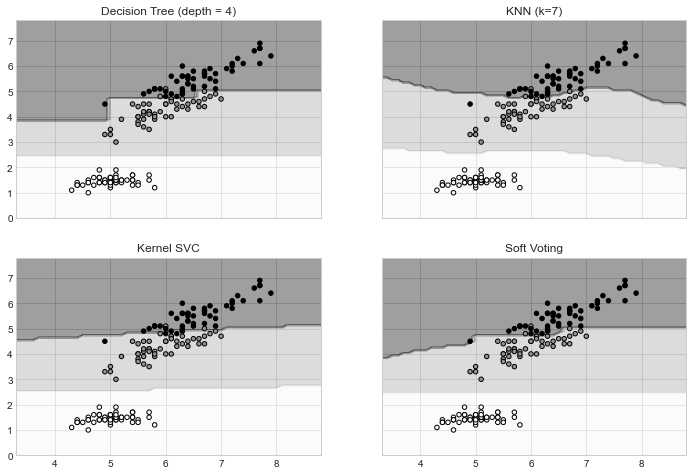

In [174]:
f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(12,8))

for idx, model, tt in zip(product([0,1], [0,1]),
                         [model1, model2, model3, vote_model],
                         ['Decision Tree (depth = 4)', 'KNN (k=7)', 'Kernel SVC', 'Soft Voting']):
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k')
    axarr[idx[0], idx[1]].set_title(tt)
    
plt.show()

## 투표 기반 회귀 (Voting Regressor)

* 서로 다른 모델의 예측 값의 평균을 사용

In [175]:
from sklearn.linear_model import LinearRegression

In [181]:
model1 = LinearRegression()
model2 = GradientBoostingRegressor()
model3 = RandomForestRegressor()
vote_model = VotingRegressor(estimators=[('linear', model1), ('gbr', model2), ('rfr', model3)], 
                             weights=[1, 1, 1])

In [182]:
for model in (model1, model2, model3, vote_model):
    model_name = str(type(model)).split('.')[-1][:-2]
    scores = cross_val_score(model, X=boston.data, y=boston.target, cv=5)
    print("R2: %0.2f (+/- %0.2f) [%s]" %(scores.mean(), scores.std(), model_name))

R2: 0.35 (+/- 0.38) [LinearRegression]
R2: 0.68 (+/- 0.15) [GradientBoostingRegressor]
R2: 0.63 (+/- 0.21) [RandomForestRegressor]
R2: 0.66 (+/- 0.21) [VotingRegressor]


### 회귀식 시각화

In [183]:
X = boston.data[:, 0].reshape(-1,1)
y = boston.target

In [184]:
model1 = LinearRegression()
model2 = GradientBoostingRegressor()
model3 = RandomForestRegressor()
vote_model = VotingRegressor(estimators=[('linear', model1), ('gbr', model2), ('rfr', model3)], 
                             weights=[1, 1, 1])

model1 = model1.fit(X, y)
model2 = model2.fit(X, y)
model3 = model3.fit(X, y)
vote_model = vote_model.fit(X, y)

In [185]:
x_min, x_max = X[:, 0].min()-1, X[:, 0].max()+1
xx = np.arange(x_min, x_max, 0.1)

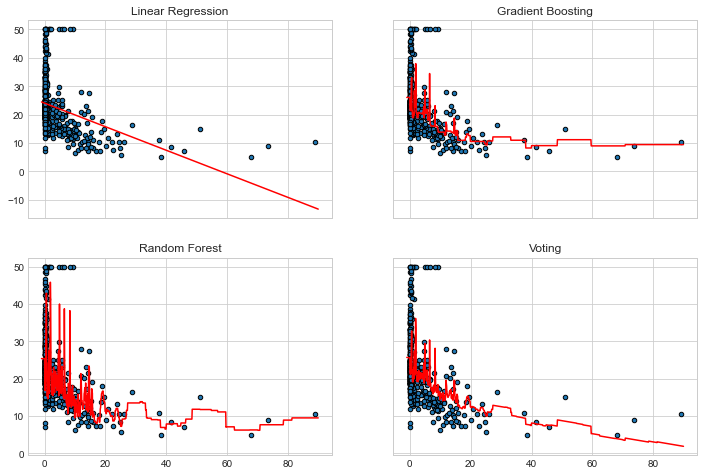

In [188]:
f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(12,8))

for idx, model, tt in zip(product([0,1], [0,1]),
                         [model1, model2, model3, vote_model],
                         ['Linear Regression', 'Gradient Boosting', 'Random Forest', 'Voting']):
    Z = model.predict(xx.reshape(-1,1))
    
    axarr[idx[0], idx[1]].plot(xx, Z, c='r')
    axarr[idx[0], idx[1]].scatter(X, y, s=20, edgecolor='k')
    axarr[idx[0], idx[1]].set_title(tt)
    
plt.show()

## 스택 일반화 (Stacked Generalization)

* 각 모델의 예측 값을 최종 모델의 입력으로 사용
* 모델의 편향을 줄이는데 효과적

### 스택 회귀

In [ ]:
# from sklearn.ensemble import StackingClassifier, StackingRegressor
# import Ridge, Lasso

In [192]:
estimators = [('ridag', Ridge()), ('lasso', Lasso()), ('svr', SVR())]

In [193]:
reg = make_pipeline(StandardScaler(),
                    StackingRegressor(estimators=estimators,
                                      final_estimator=GradientBoostingRegressor())
                   )

In [194]:
cross_val = cross_validate(estimator=reg,
                          X=boston.data, y=boston.target,
                          cv=5)

print("avg fit time: {} (+/- {})".format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print("avg score time: {} (+/- {})".format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print("avg test score: {} (+/- {})".format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.09070787429809571 (+/- 0.004687547189198239)
avg score time: 0.003795480728149414 (+/- 0.0007403930048326337)
avg test score: 0.32196393751679786 (+/- 0.3347665376502022)


#### 회귀식 시각화

In [199]:
X = boston.data[:, 0].reshape(-1,1)
y = boston.target

In [200]:
model1 = Ridge()
model2 = Lasso()
model3 = SVR()
reg = StackingRegressor(estimators=estimators,
                        final_estimator=GradientBoostingRegressor())

model1 = model1.fit(X, y)
model2 = model2.fit(X, y)
model3 = model3.fit(X, y)
reg = reg.fit(X, y)

In [201]:
x_min, x_max = X[:, 0].min()-1, X[:, 0].max()+1
xx = np.arange(x_min, x_max, 0.1)

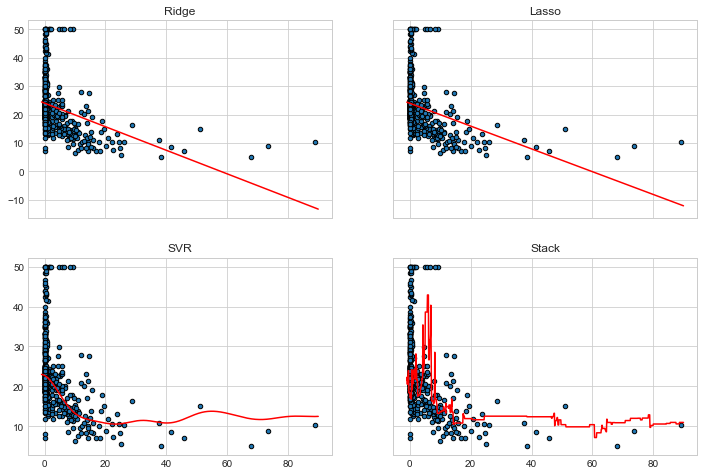

In [202]:
f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(12,8))

for idx, model, tt in zip(product([0,1], [0,1]),
                         [model1, model2, model3, reg],
                         ['Ridge', 'Lasso', 'SVR', 'Stack']):
    Z = model.predict(xx.reshape(-1,1))
    
    axarr[idx[0], idx[1]].plot(xx, Z, c='r')
    axarr[idx[0], idx[1]].scatter(X, y, s=20, edgecolor='k')
    axarr[idx[0], idx[1]].set_title(tt)
    
plt.show()

### 스택 분류

In [205]:
estimators = [('logistic', LogisticRegression(max_iter=10000)),
             ('svc', SVC()),
             ('naive', GaussianNB())]

In [206]:
clf = StackingClassifier(estimators=estimators,
                        final_estimator=RandomForestClassifier())

In [208]:
cross_val = cross_validate(estimator=clf,
                          X=iris.data, y=iris.target,
                          cv=5)

print("avg fit time: {} (+/- {})".format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print("avg score time: {} (+/- {})".format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print("avg test score: {} (+/- {})".format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.18950438499450684 (+/- 0.0028812996256862788)
avg score time: 0.007375383377075195 (+/- 0.0005057347713254968)
avg test score: 0.9733333333333334 (+/- 0.02494438257849294)


#### 결정 경계 시각화

In [209]:
X = iris.data[:, [0, 2]]
y = iris.target

In [210]:
model1 = LogisticRegression(max_iter=10000)
model2 = SVC()
model3 = GaussianNB()
estimators = [('Linear Regression', model1), ('svc', model2), ('naive', model3)]
stack_model = StackingClassifier(estimators=estimators,
                                 final_estimator=RandomForestClassifier())

In [211]:
model1 = model1.fit(X, y)
model2 = model2.fit(X, y)
model3 = model3.fit(X, y)
stack_model = stack_model.fit(X, y)

In [212]:
x_min, x_max = X[:, 0].min()-1, X[:, 0].max()+1
y_min, y_max = X[:, 1].min()-1, X[:, 1].max()+1
xx , yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

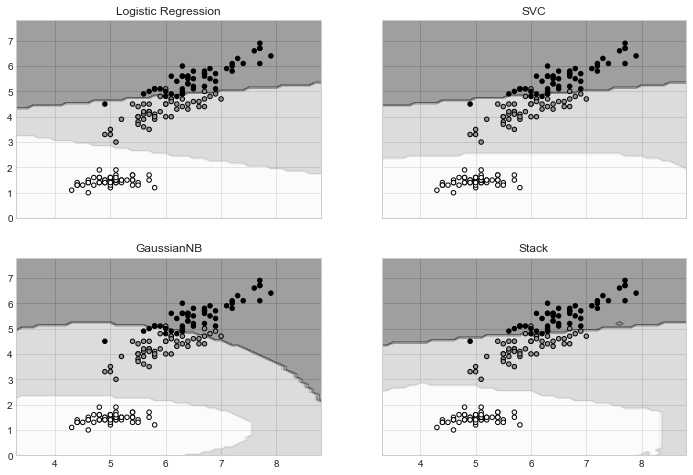

In [213]:
f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(12,8))

for idx, model, tt in zip(product([0,1], [0,1]),
                         [model1, model2, model3, stack_model],
                         ['Logistic Regression', 'SVC', 'GaussianNB', 'Stack']):
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k')
    axarr[idx[0], idx[1]].set_title(tt)
    
plt.show()